In [29]:
import torch
import torchvision    
import torch.nn as nn                                                   
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose, Normalize
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math

# آ

In [6]:
df = pd.read_csv('international_matches.csv', parse_dates=['date'])
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


# ب

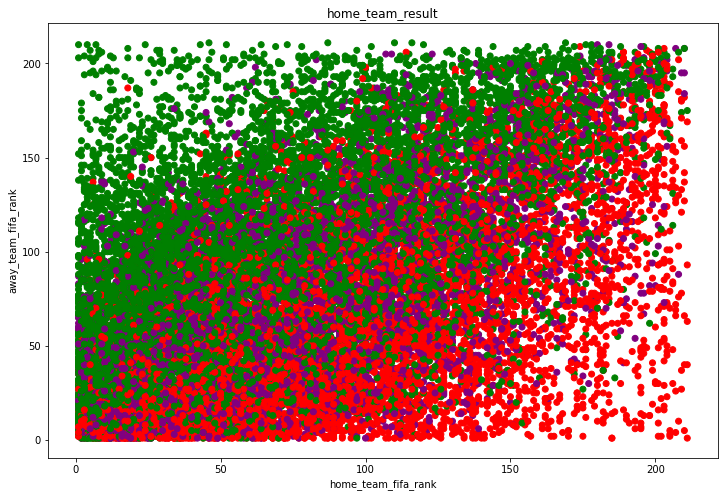

In [4]:
colors = {'Lose': 'red', 'Draw': 'purple' , 'Win' : 'green'}
plt.figure(figsize=(12,8))
plt.scatter(df.home_team_fifa_rank, df.away_team_fifa_rank, c=df.home_team_result.map(colors))
plt.xlabel('home_team_fifa_rank')
plt.ylabel('away_team_fifa_rank')
plt.title('home_team_result')
plt.show()

# ج

In [8]:
df = df[(df[['home_team_total_fifa_points', 'away_team_total_fifa_points']] != 0).any(axis=1)].reset_index(drop=True)
df.shape

(9670, 25)

In [10]:
df = df[['home_team_result','home_team_fifa_rank','home_team_total_fifa_points',
        'away_team_fifa_rank', 'away_team_total_fifa_points']]
df.head(5)

,home_team_result,home_team_fifa_rank,home_team_total_fifa_points,away_team_fifa_rank,away_team_total_fifa_points
0,Win,114,260,158,112
1,Draw,120,245,129,208
2,Win,108,298,88,364
3,Win,101,325,98,328
4,Lose,96,338,127,221


In [11]:
map = {'Lose':0, 'Draw':1, 'Win':2}
df = df.replace({'home_team_result': map})
df.head(5)

,home_team_result,home_team_fifa_rank,home_team_total_fifa_points,away_team_fifa_rank,away_team_total_fifa_points
0,2,114,260,158,112
1,1,120,245,129,208
2,2,108,298,88,364
3,2,101,325,98,328
4,0,96,338,127,221


In [12]:
data = df.to_numpy()
X = data[:,1:]
y = data[:,0]
print(X.shape)
print(y.shape)

(9670, 4)
(9670,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7252, 4) (7252,)
(2418, 4) (2418,)


In [16]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
class CustomImageDataset(Dataset):
    def __init__(self, labels, data, transform=None, target_transform=None):
        self.labels = labels
        self.data = data
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        x = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            label = self.target_transform(label)
        return x, label

In [26]:
train_set = CustomImageDataset(y_train,X_train)
test_set = CustomImageDataset(y_test,X_test)
len(train_set),len(test_set)

(7252, 2418)

In [28]:
batch_size  = 32   # Using minibatches of 32 samples

train_loader = DataLoader(dataset=train_set,
                          batch_size=batch_size,
                          shuffle=True           
                          )


test_loader = DataLoader(dataset=test_set,
                         batch_size=batch_size,
                         shuffle=True
                         )

# د

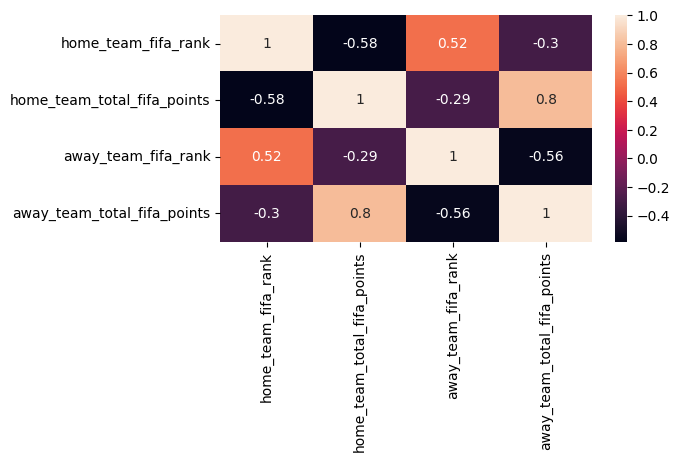

In [27]:
plt.figure(figsize=(6, 3), dpi=100)
sns.heatmap(df[['home_team_fifa_rank','home_team_total_fifa_points',
        'away_team_fifa_rank', 'away_team_total_fifa_points']].corr(), annot=True)
plt.show()

# ه

In [31]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8,3)
        )

    def forward(self, x):
        logits = self.sequential(x)
        return logits
    
model = NeuralNetwork()

# و

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [55]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(torch.float32))
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(torch.float32))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
    return test_loss

In [60]:
epochs = 30
test_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    loss = test_loop(test_loader, model, loss_fn)
    test_losses.append(loss)
print("Done!")

Epoch 1
-------------------------------
loss: 1.056284  [    0/ 7252]
loss: 0.736151  [ 3200/ 7252]
loss: 0.751374  [ 6400/ 7252]
Test Error: 
 Accuracy: 57.0%, Avg loss: 0.922580 

Epoch 2
-------------------------------
loss: 1.059852  [    0/ 7252]
loss: 0.818538  [ 3200/ 7252]
loss: 0.870127  [ 6400/ 7252]
Test Error: 
 Accuracy: 56.8%, Avg loss: 0.923393 

Epoch 3
-------------------------------
loss: 0.893862  [    0/ 7252]
loss: 0.902892  [ 3200/ 7252]
loss: 0.852961  [ 6400/ 7252]
Test Error: 
 Accuracy: 57.1%, Avg loss: 0.922466 

Epoch 4
-------------------------------
loss: 0.768834  [    0/ 7252]
loss: 0.856056  [ 3200/ 7252]
loss: 1.046918  [ 6400/ 7252]
Test Error: 
 Accuracy: 57.1%, Avg loss: 0.923363 

Epoch 5
-------------------------------
loss: 0.935772  [    0/ 7252]
loss: 0.983771  [ 3200/ 7252]
loss: 0.801326  [ 6400/ 7252]
Test Error: 
 Accuracy: 57.6%, Avg loss: 0.921575 

Epoch 6
-------------------------------
loss: 1.075240  [    0/ 7252]
loss: 0.893113  [ 32

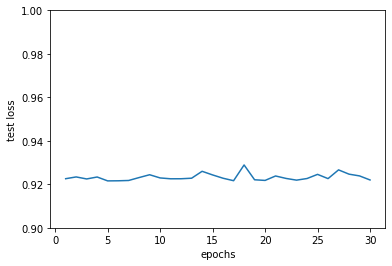

In [77]:
plt.plot(range(1,31),test_losses)
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.ylim([0.9,1.])
plt.show()

# ز

In [62]:
# Rankings and Points before World Cup:
# Iran : 21  1564
#USA :   15  1633
#England: 5  1761
#Wales:  18  1588

#Games:                                  #Data Format: home_rank home_point away_rank away_point
# Iran(away_team) - England(home_team)   5  1633 21 1564
# Iran(home_team) - Wales(away_team)     21 1564 18 1588
# Iran(home_team) - USA(away_team)       21 1564 15 1633

In [72]:
# Game 1 home_team England
g1 = np.array([[5,1633,21,1564]],dtype=np.float32)
g1 = scaler.transform(g1)
g1 = torch.from_numpy(g1)

# passing the input to the model
logits = model(g1)
print(f"Model's output: \n {logits} \n")

# calculating model predictions by applying a softmax
probs = nn.Softmax(dim=1)(logits) # finding the probabilities
print(f"Prediction probabilities: \n England lose {probs[0,0]::>0.3f} England draw {probs[0,1]:>0.3f} England win {probs[0,2]:>0.3f} \n")
print(f"Iran win probability against England: {probs[0,0]:>0.3f}")

Model's output: 
 tensor([[-0.4708, -0.2470,  0.4985]], grad_fn=<AddmmBackward0>) 

Prediction probabilities: 
 England lose 0.205 England draw 0.256 England win 0.539 

Iran win probability against England: 0.205


In [75]:
# Game 2 home_team Iran
g2 = np.array([[21,1564,18,1588]],dtype=np.float32)
g2 = scaler.transform(g2)
g2 = torch.from_numpy(g2)

# passing the input to the model
logits = model(g2)
print(f"Model's output: \n {logits} \n")

# calculating model predictions by applying a softmax
probs = nn.Softmax(dim=1)(logits) # finding the probabilities
print(f"Prediction probabilities: \n Iran lose {probs[0,0]::>0.3f} Iran draw {probs[0,1]:>0.3f} Iran win {probs[0,2]:>0.3f} \n")
print(f"Iran win probability against Wales: {probs[0,2]:>0.3f}")

Model's output: 
 tensor([[ 0.1619, -0.0549,  0.0561]], grad_fn=<AddmmBackward0>) 

Prediction probabilities: 
 Iran lose 0.370 Iran draw 0.298 Iran win 0.333 

Iran win probability against Wales: 0.333


In [76]:
# Game 2 home_team Iran
g3 = np.array([[21,1564,15,1633]],dtype=np.float32)
g3 = scaler.transform(g3)
g3 = torch.from_numpy(g3)

# passing the input to the model
logits = model(g3)
print(f"Model's output: \n {logits} \n")

# calculating model predictions by applying a softmax
probs = nn.Softmax(dim=1)(logits) # finding the probabilities
print(f"Prediction probabilities: \n Iran lose {probs[0,0]::>0.3f} Iran draw {probs[0,1]:>0.3f} Iran win {probs[0,2]:>0.3f} \n")
print(f"Iran win probability against USA: {probs[0,2]:>0.3f}")

Model's output: 
 tensor([[ 0.3241, -0.0102, -0.0537]], grad_fn=<AddmmBackward0>) 

Prediction probabilities: 
 Iran lose 0.416 Iran draw 0.298 Iran win 0.285 

Iran win probability against USA: 0.285
